In [5]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Implementing a SOM

In [39]:
class Som:
    def __init__(self, nrows, ncols, input_len, lr0 = 0.1, radius0 = 4.0):
        """
            Initialize your class
        """
        self.nrows = nrows
        self.ncols = ncols
        self.input_len = input_len
        self.lr0 = lr0
        self.radius0 = radius0
        self.weights = np.random.rand(nrows, ncols, input_len)




    def unit_distances(self, ex):
        """
            Returns a nrow x ncols matrix containing in cell (i,j) the euclidean distances between ex and the weight of the unit in position (i,j).

            nrows = 2, ncols = 2, input_len 2

            weights = [[[0.1, 0.3] - ex, [0.4, 0.8] - ex],
                       [[0.7, 0.2] - ex, [0.5, 0.5] -ex ]]

            ex = [0.11, 0.35]

            ud =  [ [dist([0.1, 0.3],[0.11, 0.35]), dist([0.4, 0.8], ex)],
                    [dist([0.7, 0.2]), ex], dist([0.5, 0.5], ex) ]


            M = [[[2, 3], [3, 4]], 
                 [4, 5]]

        """
        
        return np.linalg.norm(self.weights - ex, axis=len(self.weights.shape)-1, ord=2)

    def bmu(self, ex):
        """
            Given an example returns the coordinates of the unit in the map with the largest activation
        """
        dists = self.unit_distances(ex)
        return np.array(np.unravel_index(np.argmin(dists), dists.shape))

    def lr(self, t):
        """
            Returns the learning rate for training step number 't'
        """
        return self.lr0 * np.exp(-t/self.T)


    def neighborhood_radius(self, t):
        """
            Returns the neighborhood radius at time 't'. It corresponds to sigma(n) in the theory.
        """
        return self.radius0 * np.exp(-t/(1000/np.log10(self.radius0)))


    def topological_neighborhood(self, unit1, unit2, t):
        """
            Returns the neighborhood weight for the given two units (evaluated at time t). It corresponds to function h_{j,i} in the theory.
        """
        d12 = np.linalg.norm(unit1 - unit2)
        return np.exp( - d12**2 / (2*self.neighborhood_radius(t)**2) )

    def _train_step(self, ex, t):
        bmu = self.bmu(ex)
        lr = self.lr(t)

        for i in range(self.nrows):
            for j in range(self.ncols):
                hij = self.topological_neighborhood([i,j], bmu, t)        
                self.weights[i,j] = self.weights[i,j] + lr * hij * (ex - self.weights[i][j])



    def fit(self, data, T):
        """
            Performs 'T' training steps (you might want to store T inside a variable in the object so that it can be used to evaluate the formulae
            for the neighbor radius and for h)
        """

        self.T = T
        for t in range(T):
            ex = data[np.random.randint(0, len(data)-1)]
            self._train_step(ex, t)
        


# Experiments on the `Digits` dataset

Load the dataset

In [40]:
digits = datasets.load_digits()

`digits.data` now contains the examples in the dataset while `digits.target` contains the classess associated to the examples.

SOMs usually perform best when the data is normalized. Normalize the data (choose the technique you prefer) and put the results in X and y variables.

In [41]:
X = digits.data
y = digits.target

Instantiate the som with an n x n matrix setting an appropriate learning rate and radius. Experiment with different n, lr and radiuses to find something that gives you good results.

In [45]:
som = Som(30,30,64,lr0=0.1, radius0=8)

Train the SOM. You may want to perform at least 1000 iterations, but feel free to experiemnt with other values.

In [46]:
som.fit(X, 1000)

Use the following script to plot your results, if everything is ok, you should see the digits to be nicely organized into neat clusters in the map.

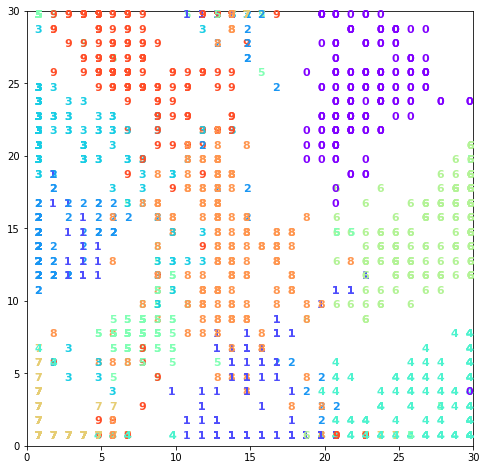

In [47]:
plt.figure(figsize=(8,8))

for x, t in zip(X,y):
    bmu = som.bmu(x)
    plt. text(bmu[0]+.5,  bmu[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})

plt.axis([0, som.weights.shape[0], 0,  som.weights.shape[1]])
plt.show()


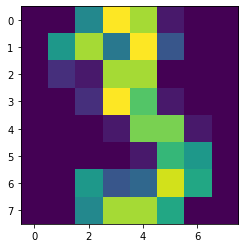

In [23]:
plt.imshow(X[3].reshape(8,8))